## PHYS 121: Calculating $Q$ and $I$ of a charging capacitor as a function of time
March 2, 2025

This notebook attempts to calculate how the charge $Q$ and current $I$ evolve with time when charging a capacitor using a battery, resistor, and switch.  We assume at the switch is closed at time $t = 0$ and that the capacitor is initially uncharged.  The circuit that we will consider is shown in Fig. 1 below.  We will assume that:
 - $V_\mathrm{b} = 10\rm\ V$
 - $R = 1\rm\ k\Omega$
 - $C = 10\rm\ mF$
 
<p>
<center>
<img src="RC_switch.svg" alt="image info" style="width: 25%; height: auto;" /><br>
<b>Fig. 1: A circuit to charge capacitor $C$ using a battery, resistor, and switch.  We assume that the capacitor is initially uncharged and the switch is closed at $t=0$. Figure adapted from Wikimedia Commons (<a href = "https://commons.wikimedia.org/wiki/File:RC_switch.svg">https://commons.wikimedia.org/wiki/File:RC_switch.svg</a>).</b></center>
</p>

Kirchhoff's voltage-loop rule requires that $V_\mathrm{b} = V_R + V_C$ at all times.  Here, $V_\mathrm{b}$ is the voltage supplied by the battery, $V_R = IR$ is the voltage across the resistor, and $V_C=Q/C$ is the voltage across the capacitor.  $I$ is the current in the circuit and $Q$ is the charge on the capacitor.  Solving the loop rule for the current $I$ results in:

\begin{align}
I &= \dfrac{V_\mathrm{b} - \dfrac{Q}{C}}{R}\\
&= \frac{V_\mathrm{b}}{R} - \frac{Q}{RC}\\
\therefore I &= I_0 - \frac{Q}{\tau}\tag{1}
\end{align}

In the last set, we have defined $I_0 = V_\mathrm{b}/R$ and $\tau = RC$.  Physically, $I_0$ represents the initial current when the switch is closed at $t=0$ and the capacitor is uncharged.  $\tau$ has units of time and is referred to as a **time constant**.  It determines how long it takes to charge (or discharge) the capacitor. 

Recall that the current is determined by how the charge $Q$ changes during time interval $\Delta t$: $I = \Delta Q/\Delta t$.  Therefore, the change in the charge can be determined using Eq. (1) and the time interval:

$$
\Delta Q = I\Delta t
\tag{2}
$$

In order to solve for the time evolution of current and charge, we will repeatedly use Eqs. (1) and (2) to calculate $I$ and $\Delta Q$ as we advance in time in steps of $\Delta t$.  For our calculation, we will use:
 - $I_0 =  V_\mathrm{b}/R = 10\rm\ mA$
 - $\tau = RC = 10\rm\ s$
 - $\Delta t = 1\rm\ s$
 
The strategy is to start with $Q=0$ at $t=0$ and then:
 1. Calculate $I$ using Eq. (1)
 2. Calculate $\Delta Q$ using Eq. (2)
 3. Update the charge on the capacitor: $Q\to Q+\Delta Q$
 4. Update the time: $t\to t+\Delta t$
 5. Return to step 1 and iterate $N$ times

In [1]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt

The cell below defines parameter values that we'll use for this calculation.  Let's start with $N=50$.

In [2]:
Vb = 10 # V
R = 1000 # ohms
C = 0.010 # F
I0 = Vb/R # A
tau = R*C # s
N = 50 # Number of iterations
tmax = 50 # s
dt = tmax/N

Set up some empy arrays that will be used to store the calculated results.  Also set the initial time and charge to zero.

In [3]:
QList = np.array([]) # Empty charge array
IList = np.array([]) # Empty current array
tList = np.array([]) # Empty time array
t = 0 # Initial time
Q = 0 # Initial charge

The cell below is a loop that implements the iterative calculation described above.  See the comments within the cell to see what each line of code is doing.

In [4]:
for i in range(N): # Loop over the lines of code below N times
    I = I0 - Q/tau # Eq. (1) calculation -- step 1
    
    QList = np.append(QList, np.array([Q])) # Add charge data to the charge array
    IList = np.append(IList, np.array([I])) # Add current data to the current array
    tList = np.append(tList, np.array([t])) # Add time data to the time array
        
    dQ = I*dt # Eq. (2) calculation -- step 2
    Q = Q + dQ # Update the capacitor charge -- step 3
    t = t + dt # Update the time -- step 4

Having populated the charge, current, and time arrays with data, we can produce the desired $Q$ versus $t$ and $I$ versus $t$ plots.  The two cells below also compare our results to the exact $Q(t)$ and $I(t)$ expressions that can be found by solving the appropriate differential equations.  If you take more math during your degree, you will learn the techniques used to solve differential equations in MATH 215.  The exact expressions are:

\begin{align}
Q &= Q_\infty\left(1-e^{-t/\tau}\right)\tag{3}\\
I &= I_0e^{-t/\tau}\tag{4}
\end{align}

where $Q_\infty = C V_\mathrm{b}$.  Physically, $Q_\infty$ represents the charge on the capacitor a *long* time after the switch has been closed (i.e. $t\to\infty$).

#### Start with the plot of $Q$ versus $t$.  

Notice that the calculated values closely follow the exact curve, but there are some noticeable differences.  Our approximate calculation improves as we decrease $\Delta t$, the size of the time interval.  Try re-running the code after increasing $N$ from $50$ to $5000$.  You should find that the calculated values very closely following the exact curve.

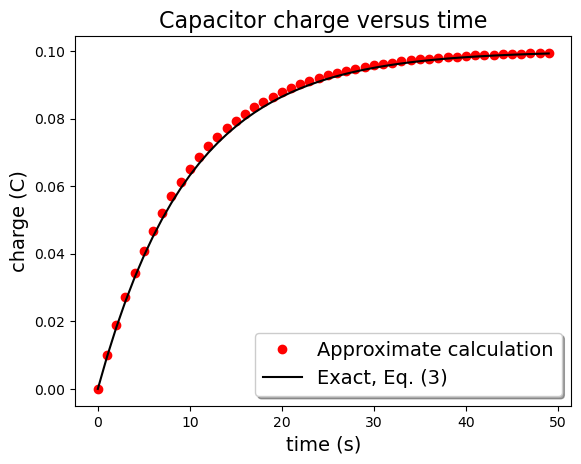

In [5]:
# Plot the calculated Q versus t data
plt.plot(tList, QList, 'ro')

# Calculate the plot the exact Q versus t curve
Qexact = C*Vb*(1 - np.exp(-tList/tau)) # Calculate Qexact 
plt.plot(tList, Qexact, 'k') # Plot Qexact

# Format the plot
plt.xlabel('time (s)', fontsize = 14)
plt.ylabel('charge (C)', fontsize = 14)
plt.title('Capacitor charge versus time', fontsize = 16)
plt.legend(('Approximate calculation', 'Exact, Eq. (3)'), shadow = True, loc = 'lower right',\
           fontsize = 14);

#### Plot of $I$ versus $t$.  

Notice that the calculated values closely follow the exact curve, but there are some noticeable differences.  Again, our approximate calculation improves as we decrease $\Delta t$, the size of the time interval.  Try re-running the code after increasing $N$ from $50$ to $5000$.  You should find that the calculated values very closely following the exact curve.

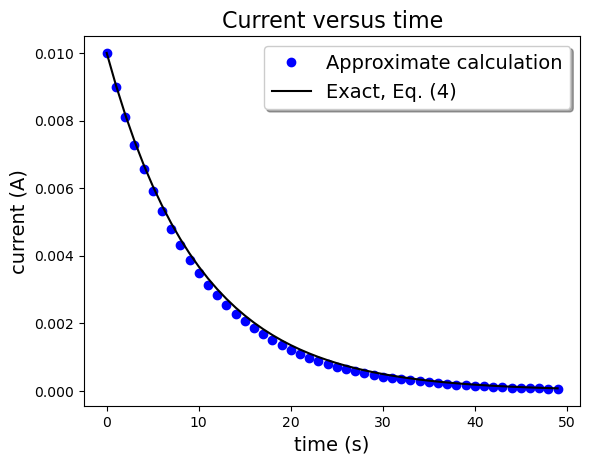

In [6]:
# Plot the calculated I versus t data
plt.plot(tList, IList, 'bo')

# Calculate the plot the exact I versus t curve
Iexact = I0*np.exp(-tList/tau) # Calculate Iexact 
plt.plot(tList, Iexact, 'k') # Plot Iexact

# Format the plot
plt.xlabel('time (s)', fontsize = 14)
plt.ylabel('current (A)', fontsize = 14)
plt.title('Current versus time', fontsize = 16)
plt.legend(('Approximate calculation', 'Exact, Eq. (4)'), shadow = True, loc = 'upper right',\
           fontsize = 14);